In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def drawRactangle(img_path,txt_path,class_name_list):
 
    img_path = img_path
    image = cv2.imread(img_path)
    # image = cv2.resize(image, (1280, 720))
    dh, dw, _ = image.shape
    fl = open(txt_path, 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        class_name, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1


        pt1 = (l, t)
        pt2 = (r, b)
        color = (255, 0, 0)
        thickness = 4
        lineType = cv2.LINE_4
        
        #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
        img_rect = cv2.rectangle(image, pt1, pt2, color, thickness, lineType)
        
        class_names_dict = class_name_list
        #text on image
        text = class_names_dict[class_name]
        org = (l, t-15)
        fontFace = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255,0,23)
        lineType = cv2.LINE_4
        
        #text, org, fontFace, fontScale, color[, thickness
        
        img_text = cv2.putText(img_rect, text, org, fontFace, fontScale, color, lineType)
    
    
    # cv2.imshow("Rectangle on Image", img_text)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # plt.figure()

    plt.imshow(cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB))
    plt.show()

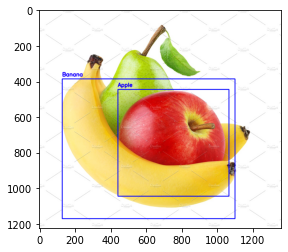

In [4]:
img_path = r"C:\Users\admin\Desktop\DX codes\computer vision\Task 4\Dataset\original_data\train\mixed_14.jpg"
txt_path = r'C:\Users\admin\Desktop\DX codes\computer vision\Task 4\Dataset\original_data\train\yolo\mixed_14.txt'
class_name_list = {0:'Apple',1:'Banana',2:'Orange'}
drawRactangle(img_path,txt_path,class_name_list)